In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle,pprint

import sqlite3
import pandas as pd
import numpy as np
import nltk


import re


from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\Users\andy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pkl_file = open('data.pkl', 'rb')
filtered_data = pickle.load(pkl_file)
#pprint.pprint(filtered_data)
pkl_file.close()

In [3]:
filtered_data.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Sentiment',
       'CleanedText'],
      dtype='object')

Filtering 2000 Positive and 2000 Negaitive review since more data points are creating :MemoryError

In [4]:
filtered_data.sort_values('Time',inplace=True)

In [5]:
filtered_10k=filtered_data.iloc[:10000,:]

In [7]:
filtered_10k.Time.head(20)

1130     961718400
1129     962236800
7338    1075420800
9545    1081209600
3439    1081555200
6709    1083456000
1097    1088467200
9542    1089504000
5818    1090972800
5819    1091059200
1160    1091318400
1157    1092787200
9952    1094860800
5068    1100563200
1177    1106438400
10      1107820800
6681    1108080000
2457    1108771200
8029    1109289600
6805    1113782400
Name: Time, dtype: int64

In [6]:
filtered_10k.reset_index(inplace=True)

In [7]:
label=filtered_10k.Sentiment

In [8]:
filtered_10k.drop('Sentiment',axis=1,inplace=True)

In [9]:
filtered_10k.head()

,index,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,1130,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,961718400,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
1,1129,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
2,7338,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,1075420800,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,winter fresh blueberri exceed food budget dri ...
3,9545,B0000VYKXC,A3L88AH6MABEDL,Javier Denison,0,0,1081209600,Best coffee I've tasted. I try others but alwa...,If you like a strong but smooth flavorful coff...,like strong smooth flavor coffe tri other keep...
4,3439,B00016UX0K,AF1PV3DIC0XM7,Robert Ashton,1,2,1081555200,Classic Condiment,Mae Ploy Sweet Chili Sauce is becoming a stand...,mae ploy sweet chili sauc becom standard condi...


In [10]:
filtered_10k.drop('index',axis=1,inplace=True)

In [11]:
filtered_10k.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
0,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,961718400,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
1,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
2,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,1075420800,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,winter fresh blueberri exceed food budget dri ...
3,B0000VYKXC,A3L88AH6MABEDL,Javier Denison,0,0,1081209600,Best coffee I've tasted. I try others but alwa...,If you like a strong but smooth flavorful coff...,like strong smooth flavor coffe tri other keep...
4,B00016UX0K,AF1PV3DIC0XM7,Robert Ashton,1,2,1081555200,Classic Condiment,Mae Ploy Sweet Chili Sauce is becoming a stand...,mae ploy sweet chili sauc becom standard condi...


### KNN

In [12]:
X_1, X_test, y_1, y_test = train_test_split(filtered_10k, label, test_size=0.2, random_state=50)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1,y_1, test_size=0.25, random_state=50)

In [13]:
print(X_1.shape,len(y_1))
print(X_tr.shape,len(y_tr))

(8000, 9) 8000
(6000, 9) 6000


### Bag Of Words

In [14]:
count_vector=CountVectorizer(ngram_range=(1,2))
vocab=count_vector.fit(X_tr.CleanedText)

bow_train=count_vector.transform(X_tr.CleanedText)
bow_cv=count_vector.transform(X_cv.CleanedText)

In [15]:
print(bow_train.get_shape())
print(bow_cv.get_shape())

(6000, 139286)
(2000, 139286)


In [16]:
bow_train_array=bow_train.toarray()
bow_cv_array=bow_cv.toarray()

In [17]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(bow_train_array,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
prediction=model.predict(bow_cv_array)
cnf_matrix=confusion_matrix(y_cv, prediction, labels=None, sample_weight=None)

In [15]:
 
def fit_and_cv(X_train,y_train,X_test,y_test):
    nbrs_list=list(range(1,11)) 
    for i in nbrs_list:
        model=KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train,y_train)
        print("For n_neighbors =",str(i))
        prediction=model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction, normalize=True) * float(100)
        print ("\nmodel accuracy is {} %".format(accuracy))

In [ ]:
fit_and_cv(bow_train_array,y_tr,bow_cv_array,y_cv)

For n_neighbors =

In [13]:
filtered_data_count.shape


(4000, 53711)

## Simple CV for practice:

In [14]:
X_1, X_test, y_1, y_test = train_test_split(filtered_data_count, filtered_4k.Sentiment, test_size=0.3, random_state=50)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1,y_1, test_size=0.3, random_state=50)

In [16]:
nbrs_list=list(range(1,11))
for i in nbrs_list:
    print("For n_neighbors =",str(i))
    fit_model(X_tr,y_tr,X_cv,y_cv,i)
    

For n_neighbors = 1

model accuracy is 90.23809523809524 %
For n_neighbors = 2

model accuracy is 73.33333333333333 %
For n_neighbors = 3

model accuracy is 81.9047619047619 %
For n_neighbors = 4

model accuracy is 70.23809523809523 %
For n_neighbors = 5

model accuracy is 87.14285714285714 %
For n_neighbors = 6

model accuracy is 86.19047619047619 %
For n_neighbors = 7

model accuracy is 84.04761904761905 %
For n_neighbors = 8

model accuracy is 84.04761904761905 %
For n_neighbors = 9

model accuracy is 84.04761904761905 %
For n_neighbors = 10

model accuracy is 83.92857142857143 %


In [24]:


def model_with_cv(X_train,y_train,X_test,y_test,cv):
    nbrs_list=list(range(1,11,2))

# empty list that will hold cv scores
    cv_scores = []

# perform 10-fold cross validation
    for k in nbrs_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_validation.cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy')
        cv_scores.append(scores.mean())

# changing to misclassification error
    MSE = [1 - x for x in cv_scores]

# determining best k
    optimal_k = nbrs_list[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
    plt.plot(nbrs_list, MSE)

    for xy in zip(nbrs_list, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))

    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
    knn_optimal.fit(X_train, y_train)

# predict the response
    pred = knn_optimal.predict(X_test)

# evaluate accuracy
    acc = accuracy_score(y_test, pred) * 100
    print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The optimal number of neighbors is 1.


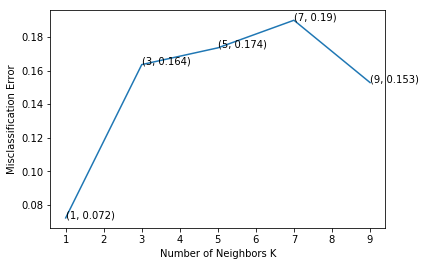

the misclassification error for each k value is :  [ 0.072  0.164  0.174  0.19   0.153]

The accuracy of the knn classifier for k = 1 is 95.666667%


In [25]:
model_with_cv(X_1,y_1,X_test,y_test,10)

### TF-IDF intialization and dimension creation

In [28]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
filtered_tf_idf = tf_idf_vect.fit_transform(filtered_4k.CleanedText)
print("the type of count vectorizer ",type(filtered_tf_idf))
print("the shape of out TF-IDF vectorizer ",filtered_tf_idf.get_shape())

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out TF-IDF vectorizer  (4000, 53711)


In [29]:
filtered_tf_idf=filtered_tf_idf.toarray()

In [30]:
X_1, X_test, y_1, y_test = train_test_split(filtered_tf_idf, filtered_4k.Sentiment, test_size=0.3, random_state=50)
#X_tr, X_cv, y_tr, y_cv = train_test_split(X_1,y_1, test_size=0.3, random_state=50)


The optimal number of neighbors is 1.


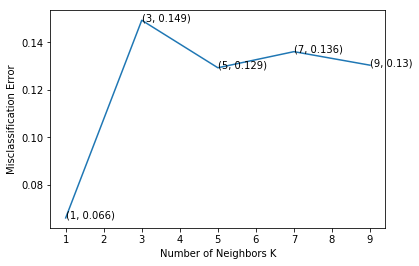

the misclassification error for each k value is :  [ 0.066  0.149  0.129  0.136  0.13 ]

The accuracy of the knn classifier for k = 1 is 95.000000%


In [31]:
model_with_cv(X_1,y_1,X_test,y_test,10)

### Wieghted Word2Vec

In [34]:
list_of_sent=[]
for sent in filtered_4k.CleanedText:
    list_of_sent.append(sent.split())

In [35]:
print(len(list_of_sent))
print(list_of_sent[0])

4000
['realli', 'good', 'idea', 'final', 'product', 'outstand', 'use', 'decal', 'car', 'window', 'everybodi', 'ask', 'bought', 'decal', 'made', 'two', 'thumb']


In [36]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

4000
50


In [37]:
type(sent_vectors)

list

In [38]:
X_1, X_test, y_1, y_test = train_test_split(sent_vectors, filtered_4k.Sentiment, test_size=0.3, random_state=50)
#X_tr, X_cv, y_tr, y_cv = train_test_split(X_1,y_1, test_size=0.3, random_state=50)


The optimal number of neighbors is 1.


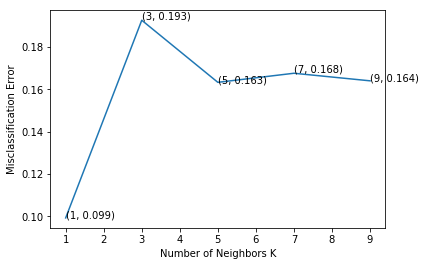

the misclassification error for each k value is :  [ 0.099  0.193  0.163  0.168  0.164]

The accuracy of the knn classifier for k = 1 is 92.500000%


In [39]:
model_with_cv(X_1,y_1,X_test,y_test,10)

### Wieghted TF-IDF

In [40]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = filtered_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [41]:
type(tfidf_sent_vectors)


list

In [42]:
X_1, X_test, y_1, y_test = train_test_split(tfidf_sent_vectors, filtered_4k.Sentiment, test_size=0.3, random_state=50)


The optimal number of neighbors is 1.


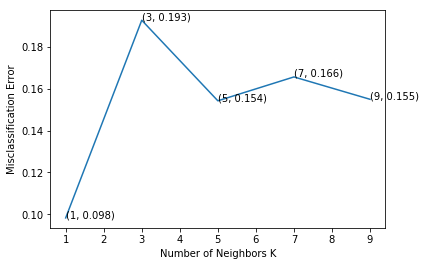

the misclassification error for each k value is :  [ 0.098  0.193  0.154  0.166  0.155]

The accuracy of the knn classifier for k = 1 is 92.833333%


In [43]:
model_with_cv(X_1,y_1,X_test,y_test,10)

## Conclusion : The best K is 1 for all 4 methods , but accuracy of BOW (95.66) is slightly higher than others. Another observation is "wieghted word2vec" and "wieghted TF-IDF took significantly less time than other two.